In [ ]:
import pandas as pd

## imports for Python, Pandas

In [ ]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

In [ ]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.


Find the 10 countries with most projects


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize

# Directly show plots without plt.show()
%matplotlib inline

# Load data from './data/world_bank_projects.json' and save it into word_bank_data variable
world_bank_data = pd.read_json('./data/world_bank_projects.json')

# Choose a subset of world_bank_data
world_bank_data1= world_bank_data[['countryshortname','project_name']]

# Group dataframe based on 'countryshortname' and sort values in a descending order
# to obtain top 10 countries with most projects
world_bank_data2= world_bank_data1.groupby('countryshortname').count().sort_values('project_name',ascending=False).head(10)
world_bank_data2.columns=['number_of_projects']
world_bank_data2

,number_of_projects
countryshortname,
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


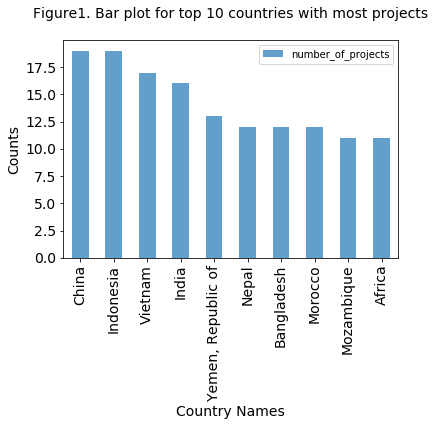

In [2]:
# Visualize top 10 countries with most projects 
world_bank_data2.plot(kind='bar',alpha=0.7)
plt.title('Figure1. Bar plot for top 10 countries with most projects\n',
         fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Country Names',fontsize=14)
plt.ylabel('Counts',fontsize=14)

Find the top 10 major project themes (using column 'mjtheme_namecode')

In [3]:
# Load json file 
world_bank_data_json= json.load((open('./data/world_bank_projects.json')))
# Use normalization to create tables from nested element
world_bank_data3= json_normalize(world_bank_data_json, 'mjtheme_namecode')
# Group dataframe based on 'name' and sort values in a descending order
# to obtain top 10 major project themes
world_bank_data4 = world_bank_data3.groupby('name').count().sort_values('code',ascending=False).head(10)
world_bank_data4.columns=['counts']
world_bank_data4

,counts
name,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
,122
Social dev/gender/inclusion,119
Trade and integration,72


In [4]:
# print out top 10 major project themes
world_bank_data4.index

Index([u'Environment and natural resources management', u'Rural development',
       u'Human development', u'Public sector governance',
       u'Social protection and risk management',
       u'Financial and private sector development', u'',
       u'Social dev/gender/inclusion', u'Trade and integration',
       u'Urban development'],
      dtype='object', name=u'name')

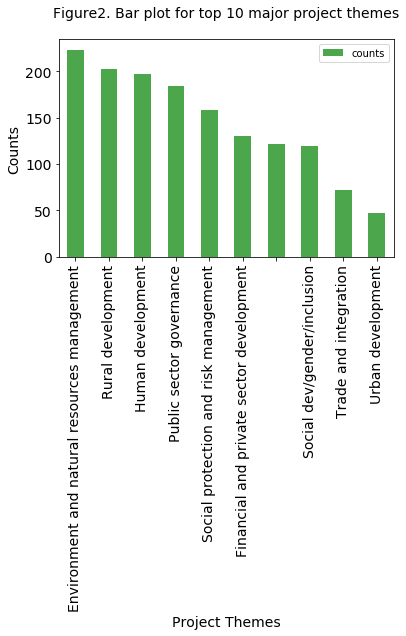

In [5]:
# Visualize top 10 major project themes
world_bank_data4.plot(kind='bar',alpha=0.7, color='g')
plt.title('Figure2. Bar plot for top 10 major project themes\n',
         fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Project Themes',fontsize=14)
plt.ylabel('Counts',fontsize=14)

In 2. above you will notice that some entries have only the code and the name is missing. 
Create a dataframe with the missing names filled in.

In [7]:
# Create a dataframe(world_bank_data5) without missing names
world_bank_data5 = world_bank_data3[world_bank_data3['name']!='']
# Change world_bank_data5['code'] type to be integer
world_bank_data5['code'] = world_bank_data5['code'].astype('int64')
# Drop the duplicates in world_bank_data5 so that only unique codes with their coresponding names exist
world_bank_data5 = world_bank_data5.drop_duplicates().sort_values('code').reset_index(drop=True)

# Create a dataframe copy(world_bank_data6) from original dataframe(world_bank_data3) with missing names.
world_bank_data6 = world_bank_data3.copy()
# Change world_bank_data6['code'] type to be integer
world_bank_data6['code']=world_bank_data6['code'].astype('int64')

# Merge world_bank_data6 and world_bank_data5 on 'code' column
world_bank_data7 = pd.merge(world_bank_data6, world_bank_data5, on='code')

world_bank_data8 = world_bank_data7[['code','name_y']]

world_bank_data8.columns=['code','project_name']

/Users/mengzhao/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
# Group dataframe based on 'project_name' and sort values in a descending order
# to obtain top 10 major project themes
world_bank_data9 = world_bank_data8.groupby('project_name').count().sort_values('code',ascending=False).head(10)
world_bank_data9.columns=['counts']
world_bank_data9

,counts
project_name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


In [9]:
# print out top 10 major project themes after handling missing names
world_bank_data9.index

Index([u'Environment and natural resources management', u'Rural development',
       u'Human development', u'Public sector governance',
       u'Social protection and risk management',
       u'Financial and private sector development',
       u'Social dev/gender/inclusion', u'Trade and integration',
       u'Urban development', u'Economic management'],
      dtype='object', name=u'project_name')

After dealing with empty project names, 'Economic management' becomes the 10th major project theme with the empty project theme disappearing 

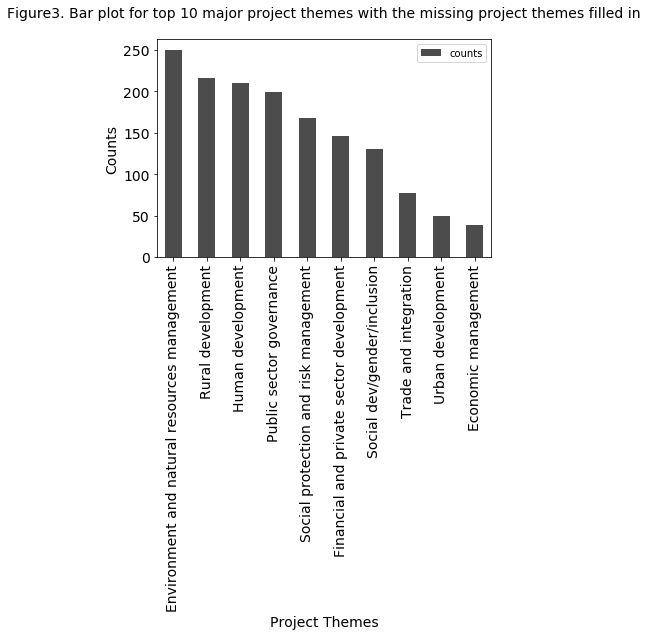

In [10]:
# Visualize top 10 major project themes after handling missing names
world_bank_data9.plot(kind='bar',alpha=0.7, color='k')
plt.title('Figure3. Bar plot for top 10 major project themes with the missing project themes filled in\n',
         fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Project Themes',fontsize=14)
plt.ylabel('Counts',fontsize=14)